# Logistic Regression Classifier - ML project
Author: Andrii Zapukhlyi

## <span style="color:#8D35FF; text-decoration:underline">Data description</span>

### We have data on airline passenger satisfaction. Below is a description of the variables:
`Gender`: Gender of the passengers (Female, Male)

`Customer Type`: The customer type (Loyal customer, disloyal customer)

`Age`: The actual age of the passengers

`Type of Travel`: Purpose of the flight of the passengers (Personal Travel, Business Travel)

`Class`: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

`Flight distance`: The flight distance of this journey

`Inflight wifi service`: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

`Departure/Arrival time convenient`: Satisfaction level of Departure/Arrival time convenient

`Ease of Online booking`: Satisfaction level of online booking

`Gate location`: Satisfaction level of Gate location

`Food and drink`: Satisfaction level of Food and drink

`Online boarding`: Satisfaction level of online boarding

`Seat comfort`: Satisfaction level of Seat comfort

`Inflight entertainment`: Satisfaction level of inflight entertainment

`On-board service`: Satisfaction level of On-board service

`Leg room service`: Satisfaction level of Leg room service

`Baggage handling`: Satisfaction level of baggage handling

`Check-in service`: Satisfaction level of Check-in service

`Inflight service`: Satisfaction level of inflight service

`Cleanliness`: Satisfaction level of Cleanliness

`Departure Delay in Minutes`: Minutes delayed when departure

`Arrival Delay in Minutes`: Minutes delayed when Arrival

`Satisfaction`: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)


### Our task will be to create a model using logistic regression for the prediction of the variable <span style="color:#8D35FF;">Satisfaction</span>

## <span style="color:#8D35FF; text-decoration:underline">Import librires and dataset</span>

In [300]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, auc

In [301]:
data = pd.read_csv("data.csv")
df = pd.DataFrame(data)

## <span style="color:#8D35FF; text-decoration:underline">Data exploration</span>

In [302]:
df.head()

,Unnamed: 0,X,id,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Inflight.wifi.service,...,Inflight.entertainment,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Inflight.service,Cleanliness,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes,satisfaction
0,1,0.0,70172.0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,2,1.0,5047.0,Male,disloyal Customer,25.0,Business travel,Business,235.0,3.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,3,2.0,110028.0,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,4,3.0,24026.0,Female,Loyal Customer,25.0,Business travel,Business,562.0,2.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,5,4.0,119299.0,Male,Loyal Customer,61.0,Business travel,Business,214.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied


I don't use any of the columns with identifiers, because each of them has missing values, so I will delete them later (they have no effect on the result) 

Let's change all column names to lowercase and delete unnecessary columns

In [303]:
df.rename(columns = lambda x: x.lower(), inplace = True)
df.drop(df.columns[[0,1,2]], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103478 non-null  object 
 1   customer.type                      103500 non-null  object 
 2   age                                103469 non-null  float64
 3   type.of.travel                     103475 non-null  object 
 4   class                              103450 non-null  object 
 5   flight.distance                    103505 non-null  float64
 6   inflight.wifi.service              103469 non-null  float64
 7   departure.arrival.time.convenient  103466 non-null  float64
 8   ease.of.online.booking             103483 non-null  float64
 9   gate.location                      103506 non-null  float64
 10  food.and.drink                     103462 non-null  float64
 11  online.boarding                    1034

After that, we have 5 columns with variables of type categorical and 18 with numerical

In [304]:
len(df[df.duplicated()])

0

There are no duplicate rows in our data frame

In [305]:
df.isna().sum()

gender                               426
customer.type                        404
age                                  435
type.of.travel                       429
class                                454
flight.distance                      399
inflight.wifi.service                435
departure.arrival.time.convenient    438
ease.of.online.booking               421
gate.location                        398
food.and.drink                       442
online.boarding                      440
seat.comfort                         420
inflight.entertainment               444
on.board.service                     413
leg.room.service                     441
baggage.handling                     450
checkin.service                      440
inflight.service                     447
cleanliness                          482
departure.delay.in.minutes           439
arrival.delay.in.minutes             722
satisfaction                           0
dtype: int64

There are missing values in every column of our dataset, except for the target column. Let's see how dependent the numerical columns are on each other

At first, replace satisfaction column with a binary, where 1 equals 'satisfied'.

In [306]:
df.satisfaction = df.satisfaction.eq('satisfied').mul(1)
num = [col for col in df.columns if df[col].dtypes != 'O']

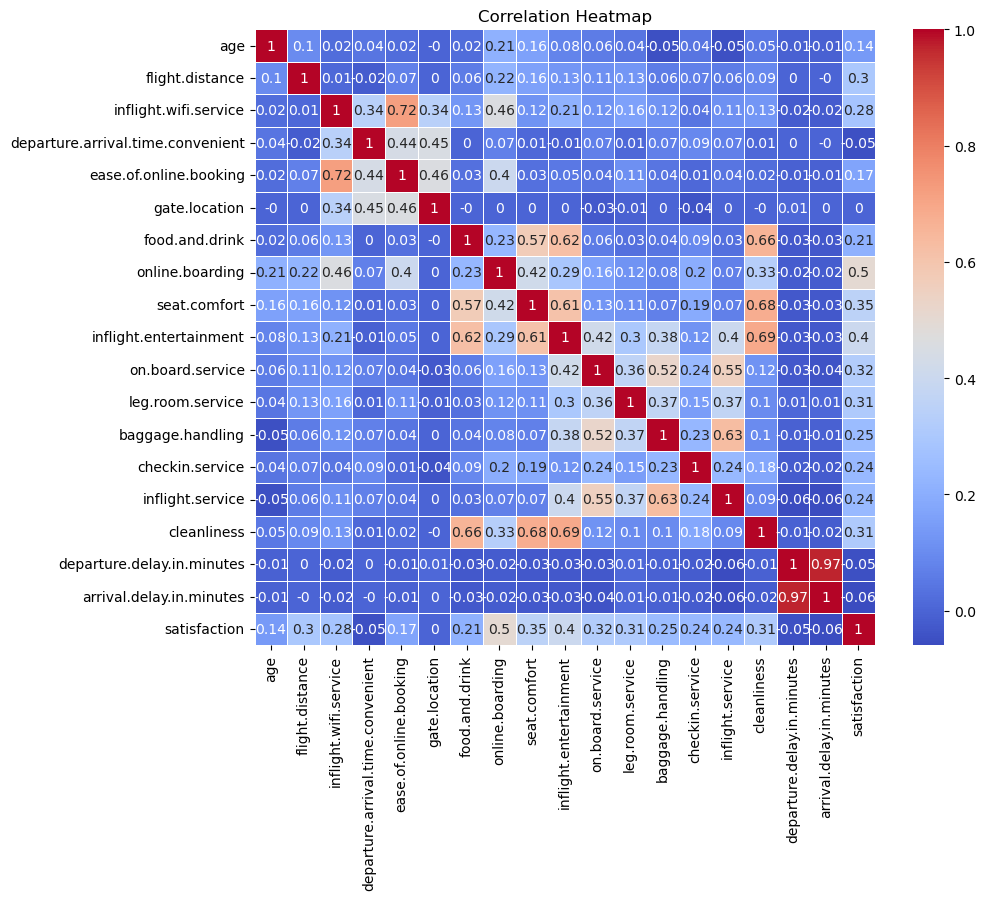

In [307]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num].corr().round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

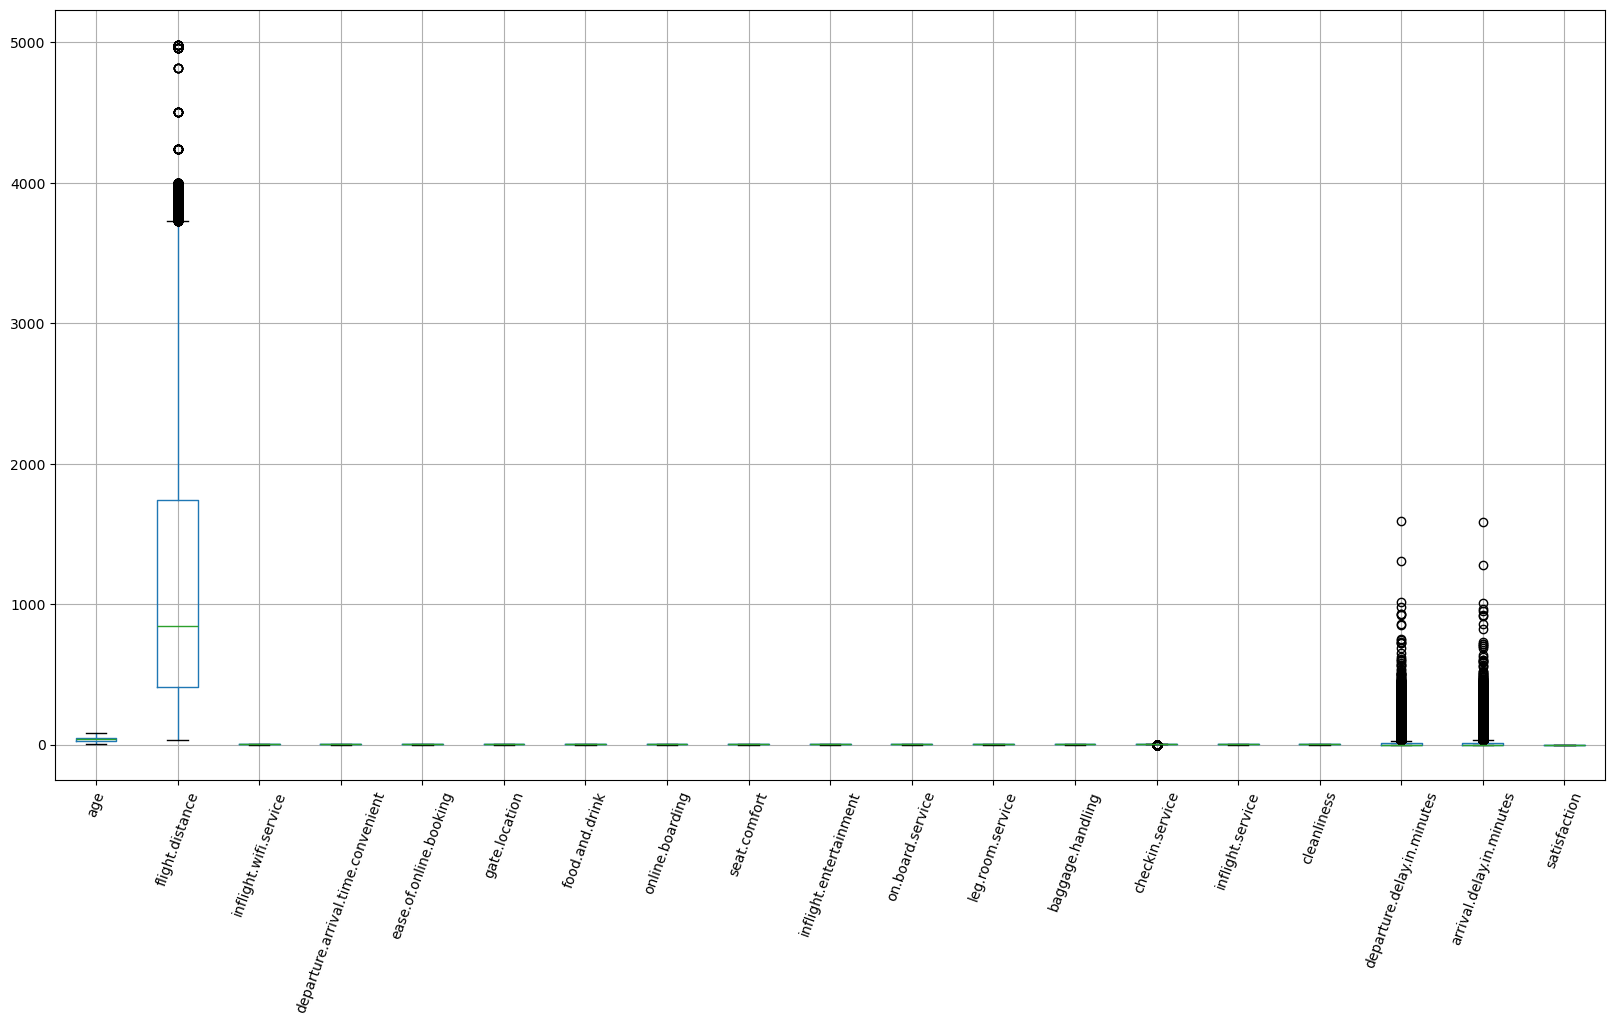

In [308]:
plt.figure(figsize=(20, 10))  
df[num].boxplot()
plt.xticks(rotation=70) 
plt.show()

In the plot above, we can see that some columns have a lot of outliers. This will affect the choice of the method for processing missing values

We will also see if our class is balanced

<Axes: >

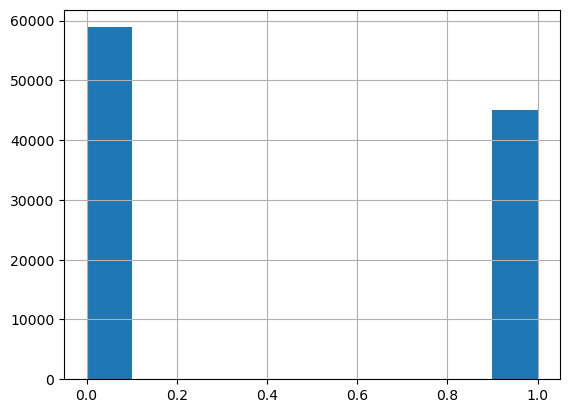

In [309]:
df.satisfaction.hist()

In [310]:
round(df.satisfaction.value_counts(normalize=True)*100)

satisfaction
0    57.0
1    43.0
Name: proportion, dtype: float64

The plot and proportions show that our class is balanced, so we can move on to the next step

## <span style="color:#8D35FF; text-decoration:underline">Data engineering</span>

Before working with missing values, I'll split our data set on training and test sets to avoid data leakage

At first, let's define our target

In [311]:
predictors = df.drop('satisfaction', axis = 1)
target = df['satisfaction']

Now, we can get training and test sets

In [312]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((83123, 22), (20781, 22))

### Cleaning missing values in numerical variables

According to our data exploration, some columns have outliers. So, I will use median imputation to fill in the missing values, because it's robust to outliers.

Imputation should be performed on the training set and then extended to the test set. This means that the statistics that will be used to fill in the missing values in the training and test samples should be derived from the training sample only. This is to avoid overfitting.

In [313]:
num.remove('satisfaction')
for df1 in [X_train, X_test]:
    for col in num:
        median = X_train[col].median()
        df1[col] = df1[col].fillna(median)

### Cleaning missing values in categorical variables

To get rid of the missing categorical values, I will impute them with a KNN imputer <br>
At first, the categorical features should be encoded to impute the remaining empty values, so I'll encode them with One-Hot encoding

In [314]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

In [315]:
X_train_encoded = pd.concat([X_train[num], pd.get_dummies(X_train[categorical])], axis=1)
X_test_encoded = pd.concat([X_test[num], pd.get_dummies(X_test[categorical])], axis=1)

In [316]:
imputer = KNNImputer(n_neighbors=3)
X_train = imputer.fit_transform(X_train_encoded)
X_test = imputer.transform(X_test_encoded)

X_train = pd.DataFrame(X_train, columns=X_train_encoded.columns)
X_test = pd.DataFrame(X_test, columns=X_test_encoded.columns)

In [325]:
print("NaN values in X_train:", X_train.isna().sum().sum(), "NaN values in X_test:", X_test.isna().sum().sum())

NaN values in X_train: 0 NaN values in X_test: 0


Now, we can notice, that there are no missing values in the data

## <span style="color:#8D35FF; text-decoration:underline">Data scaling</span>

For data scaling, I will use MinMaxScaler 

In [318]:
scaler = MinMaxScaler()
X_train[num] = pd.DataFrame(scaler.fit_transform(X_train[num]))
X_test[num] = pd.DataFrame(scaler.transform(X_test[num]))
X_train.describe()

,age,flight.distance,inflight.wifi.service,departure.arrival.time.convenient,ease.of.online.booking,gate.location,food.and.drink,online.boarding,seat.comfort,inflight.entertainment,...,arrival.delay.in.minutes,gender_Female,gender_Male,customer.type_Loyal Customer,customer.type_disloyal Customer,type.of.travel_Business travel,type.of.travel_Personal Travel,class_Business,class_Eco,class_Eco Plus
count,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,...,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000
mean,0.414902,0.233164,0.546022,0.612629,0.551491,0.595270,0.640254,0.649880,0.610261,0.672197,...,0.009538,0.505251,0.490526,0.813830,0.182260,0.686850,0.308880,0.474562,0.448841,0.072254
std,0.193674,0.200843,0.264788,0.303986,0.278692,0.254906,0.265110,0.269019,0.329177,0.266248,...,0.024366,0.499975,0.499913,0.389246,0.386061,0.463778,0.462034,0.499355,0.497379,0.258910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256410,0.077342,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.250000,0.400000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.423077,0.163772,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.750000,0.800000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.564103,0.343397,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,1.000000,0.800000,...,0.008207,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <span style="color:#8D35FF; text-decoration:underline">Model training</span>

I will use Logistic Regression to make the classification because this is the most popular algorithm for the classification

In [319]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

### Check for overfitting and underfitting

In [320]:
print("Training set:", round(model.score(X_train, y_train),4)) 
print("Test set:", round(model.score(X_test, y_test),4))

Training set: 0.8744
Test set: 0.8752


In [321]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation score:", np.mean(scores))

Cross-validation score: 0.8740300267029462


In [322]:
accuracy_score(y_hat, y_test)

0.8752225590683798

The values of the test and training sets are close to each other and cross-validation score close to prediction accuracy, so model isn't overfitted

## <span style="color:#8D35FF; text-decoration:underline">Model evaluation</span>

### Confusion matrix

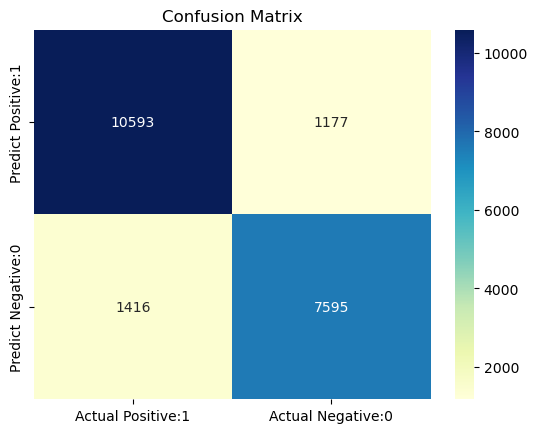

In [323]:
cm = confusion_matrix(y_test, y_hat)
cm_matrix = pd.DataFrame(data=cm, 
                         columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.show()

As we can see from the confusion matrix above, the model performed well <br>
Additionally, it has a greater problem with false negatives (FN) compared to false positives (FP)

Accuracy Score: 0.875
Precision Score: 0.866
Recall Score: 0.843
F1 Score: 0.854
ROC AUC Score: 0.871
AUC: 0.927


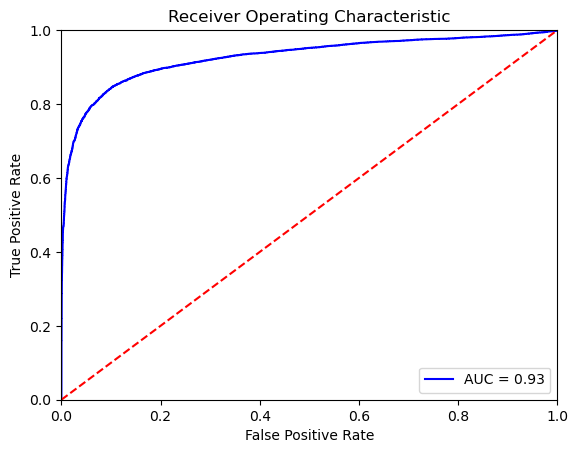

In [324]:
def metrics(df_target,predict,class_probabilities):
    print(f"Accuracy Score: {np.round(accuracy_score(df_target, predict),3)}")
    print(f"Precision Score: {np.round(precision_score(df_target, predict),3)}")
    print(f"Recall Score: {recall_score(df_target, predict).round(3)}")
    print(f"F1 Score: {f1_score(df_target, predict).round(3)}")
    print(f"ROC AUC Score: {roc_auc_score(df_target, predict).round(3)}")

    preds = class_probabilities[:, 1]
    fpr, tpr, threshold = roc_curve(df_target, preds)
    roc_auc = auc(fpr, tpr)
    print(f"AUC: {roc_auc.round(3)}")

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

probs = model.predict_proba(X_test)
metrics(y_test, y_hat, probs)

## <span style="color:#8D35FF; text-decoration:underline">Conclusion</span>

All the model scores are high, especially the AUC, which is 0.93. The model doesn't show any signs of under- or overfitting.

#### Suggestions for further improving the model:
- Training more than one model 
- Hyperparameter tuning
- Use better data preprocessing tools

## Thanks for reading!